<a href="https://colab.research.google.com/github/haridassaiprakash/Machine_Learning/blob/main/Laptops%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("laptops.csv",encoding = "ISO-8859-1", engine='python')

In [3]:
df.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
df.describe()

,Unnamed: 0,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [6]:
df.isnull().sum()

Unnamed: 0          0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [7]:
df.shape

(1303, 13)

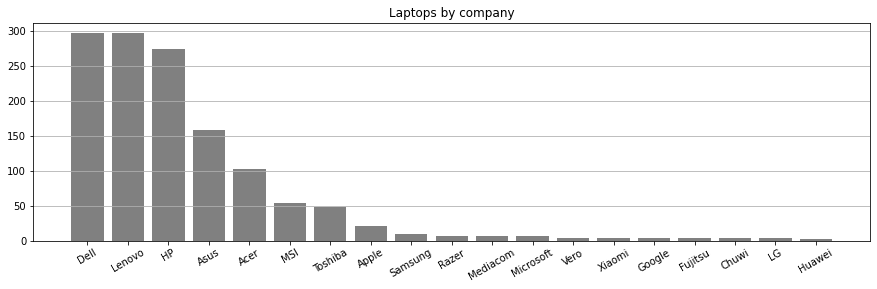

In [8]:
comp = df.groupby(['Company']).count().reset_index().sort_values(by='Unnamed: 0', ascending=False)
plt.figure(figsize=(15,4))
plt.bar(comp['Company'], comp['Unnamed: 0'], color='gray')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.title('Laptops by company')
plt.show()

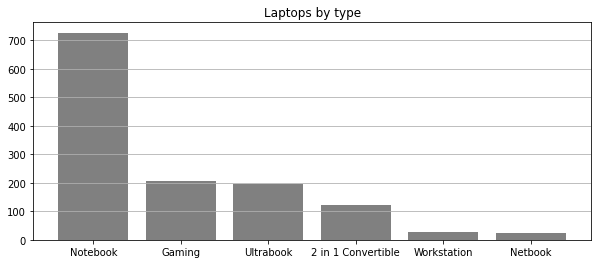

In [9]:
tn = df.groupby(['TypeName']).count().reset_index().sort_values(by='Unnamed: 0', ascending=False)
plt.figure(figsize=(10,4))
plt.bar(tn['TypeName'], tn['Unnamed: 0'], color='gray')
plt.title('Laptops by type')
plt.grid(axis='y')
plt.show()

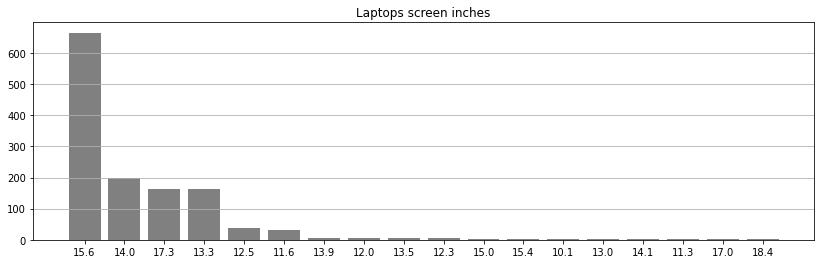

In [10]:
df['Inches'] = df['Inches'].astype(str)
inc = df.groupby(['Inches']).count().reset_index().sort_values(by='Unnamed: 0', ascending=False)
plt.figure(figsize=(14,4))
plt.bar(inc['Inches'], inc['Unnamed: 0'], color='gray')
plt.title('Laptops screen inches')
plt.grid(axis='y')
plt.show()

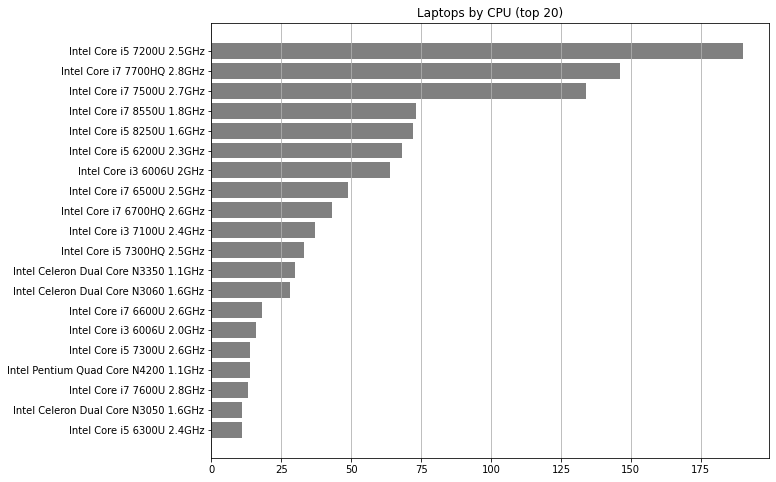

In [11]:
cpu = df.groupby(['Cpu']).count().reset_index().sort_values(by='Unnamed: 0', ascending=True).tail(20)
plt.figure(figsize=(10,8))
plt.barh(cpu['Cpu'], cpu['Unnamed: 0'], color='gray')
plt.title('Laptops by CPU (top 20)')
plt.grid(axis='x')
plt.show()

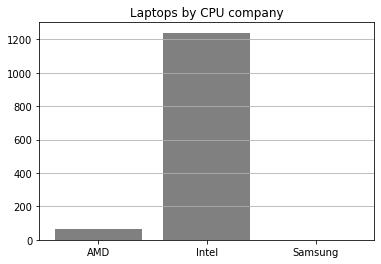

In [12]:
df['cputype'] = df['Cpu'].apply(lambda x: x.split(' ')[0])
cput = df.groupby(['cputype']).count().reset_index()
plt.bar(cput['cputype'], cput['Unnamed: 0'], color='gray')
plt.grid(axis='y')
plt.title('Laptops by CPU company')
plt.show()

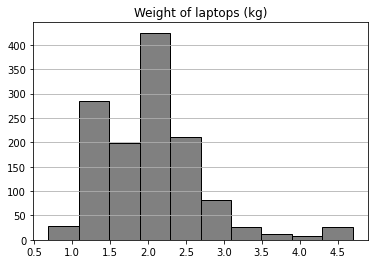

In [13]:
df['WeightNum'] = df['Weight'].apply(lambda x: x.split('kg')[0])
df['WeightNum'] = pd.to_numeric(df['WeightNum'])
plt.hist(df['WeightNum'], color='gray', edgecolor='k')
plt.title('Weight of laptops (kg)')
plt.grid(axis='y')
plt.show()


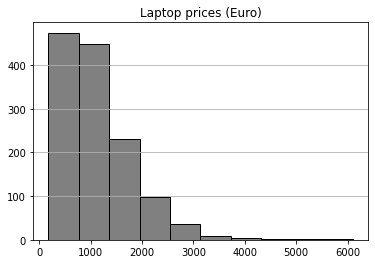

In [16]:
plt.hist(df['Price_euros'], color='gray', edgecolor='k')
plt.title('Laptop prices (Euro)')
plt.grid(axis='y')
plt.show()

In [18]:
d = {}
for name in comp['Company']:
    d[name] = df.loc[df['Company'] == name]

for name, df in d.items():
    print(d[name]['Company'].unique(),
          '\n', d[name].describe())

['Dell'] 
         Unnamed: 0  Price_euros   WeightNum
count   297.000000   297.000000  297.000000
mean    650.599327  1186.068990    2.147040
std     375.415703   672.941227    0.693744
min      14.000000   274.900000    1.180000
25%     345.000000   735.070000    1.650000
50%     639.000000   985.000000    2.180000
75%     965.000000  1472.200000    2.300000
max    1313.000000  3659.400000    4.420000
['Lenovo'] 
         Unnamed: 0  Price_euros  WeightNum
count   297.000000   297.000000  297.00000
mean    682.471380  1086.384444    2.00229
std     358.541377   698.426088    0.60085
min      19.000000   229.000000    0.69000
25%     392.000000   549.000000    1.50000
50%     650.000000   899.000000    2.10000
75%     968.000000  1488.990000    2.30000
max    1318.000000  4899.000000    4.60000
['HP'] 
         Unnamed: 0  Price_euros   WeightNum
count   274.000000   274.000000  274.000000
mean    703.722628  1067.774854    1.911314
std     393.723118   617.508031    0.518931
min     